In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

p = sns.color_palette()

## Load the training set

In [2]:
dfTrain = pd.read_csv('data/clicks_train.csv')

In [3]:
print('There are {:,d} rows in this dataset.'.format(dfTrain.shape[0]))

There are 87,141,731 rows in this dataset.


## Figure out how many ads per display and add a column with that info

In [4]:
dfTrain['# ads in display'] = dfTrain.groupby('display_id')['ad_id'].transform('count')

In [5]:
dfTrain.head(20)

,display_id,ad_id,clicked,# ads in display
0,1,42337,0,6
1,1,139684,0,6
2,1,144739,1,6
3,1,156824,0,6
4,1,279295,0,6
5,1,296965,0,6
6,2,125211,0,4
7,2,156535,0,4
8,2,169564,0,4
9,2,308455,1,4


In [16]:
adIDMostDisplayed = dfTrain['ad_id'].value_counts().index[0]

In [7]:
print('The most displayed ad is {} with {:,d} displays'.format(adIDMostDisplayed,
                                                        dfTrain[dfTrain['ad_id'] == adIDMostDisplayed].shape[0]))

The most displayed ad is 173005 with 211,824 displays


## Now get the click likelihood (# clicks for ad / # times ad is displayed)

In [8]:
dfTrain['overall click ratio'] = dfTrain.groupby('ad_id')['clicked'].transform('mean')

In [9]:
dfTrain[dfTrain['ad_id'] == adIDMostDisplayed].head(20)

,display_id,ad_id,clicked,# ads in display,overall click ratio
257,54,173005,0,9,0.076384
500,102,173005,0,3,0.076384
505,103,173005,0,5,0.076384
916,181,173005,0,6,0.076384
925,183,173005,0,6,0.076384
1168,226,173005,0,2,0.076384
1599,311,173005,0,6,0.076384
2000,394,173005,0,9,0.076384
2039,403,173005,0,5,0.076384
2103,414,173005,0,4,0.076384


In [10]:
dfTrain['click ratio per display size'] = dfTrain.groupby(['ad_id', '# ads in display'])['clicked'].transform('mean')

In [11]:
dfTrain[dfTrain['ad_id']==adIDMostDisplayed].head(30)

,display_id,ad_id,clicked,# ads in display,overall click ratio,click ratio per display size
257,54,173005,0,9,0.076384,0.025623
500,102,173005,0,3,0.076384,0.166994
505,103,173005,0,5,0.076384,0.084531
916,181,173005,0,6,0.076384,0.069433
925,183,173005,0,6,0.076384,0.069433
1168,226,173005,0,2,0.076384,0.256781
1599,311,173005,0,6,0.076384,0.069433
2000,394,173005,0,9,0.076384,0.025623
2039,403,173005,0,5,0.076384,0.084531
2103,414,173005,0,4,0.076384,0.106172


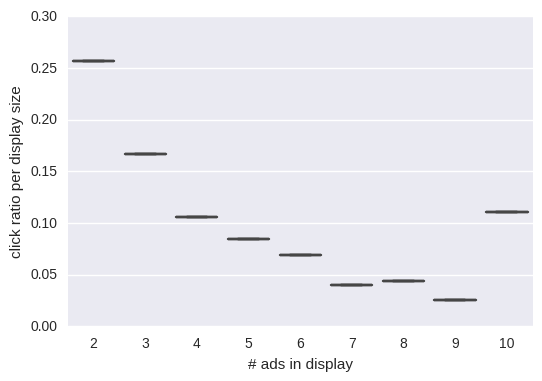

In [37]:
sns.boxplot(x="# ads in display", y="click ratio per display size", data=dfTrain[dfTrain['ad_id']==adIDMostDisplayed])

In [20]:
adHighClicks = dfTrain[(dfTrain['overall click ratio'] > 0.7) & (dfTrain['overall click ratio'] < 0.9)]['ad_id']

In [24]:
adCounts = dfTrain['ad_id'].value_counts()

In [34]:
adHighCounts = adCounts[adCounts > 10000]

In [35]:
set(adHighClicks.index).intersection(set(adHighCounts))

{26274, 42707}

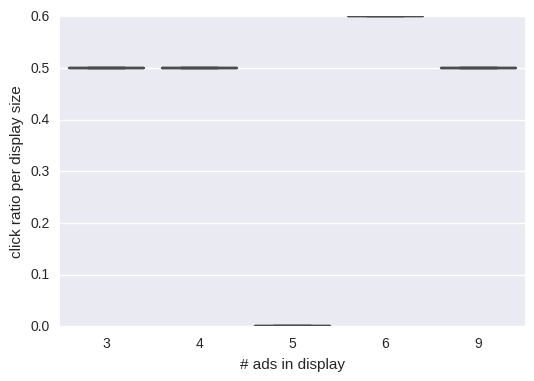

In [38]:
sns.boxplot(x="# ads in display", y="click ratio per display size", data=dfTrain[dfTrain['ad_id']==26274])

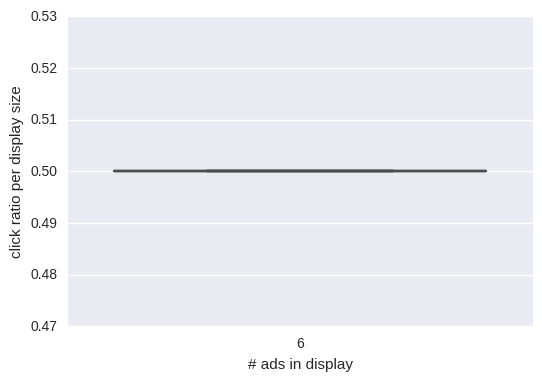

In [39]:
sns.boxplot(x="# ads in display", y="click ratio per display size", data=dfTrain[dfTrain['ad_id']==42707])